#### Imports

In [1]:
import pandas as pd
from Neuron import *
from NeuronLayer import *
from NeuronNetwork import *

from math import e

#### Maken van een waarheidstabel

In [2]:
def create_table_data(function, expectations):
    """Deze functie berekent de uitkomst van een perceptron/netwerk en geeft dit terug in een goed format"""
    data = []

    for item in expectations:
        output = function(item[0])
        data.append([item[0], output])
    return data


In [3]:
def print_table(data, caption):
    """Deze functie print een waarheidstabel"""

    columns = ['Input', 'Output']

    df = pd.DataFrame.from_records(data, columns=columns)
    print(f'<{caption}>\n {df}\n')
    

#### Uitkomsten testen

In [4]:
def test_outcome(expectation, outcome):
    """Deze functie test of de uitkomst van een perceptron/netwerk hetzelfde is als de verwachting.
    Ik heb gekozen om dit op deze 'assert' manier te doen omdat deze functie nu makkelijk en flexibel aan te roepen is.
    """

    if expectation == outcome:
        print("Test geslaagd - Verwachting & uitkomst hetzelfde")
    else:
        print('Test mislukt - Verwachting & uitkomst niet hetzelfde')
        

## Perceptron unit
Omdat het niet echt mogelijk is om een duidelijke 1 of 0 als antwoord uit de sigmoid te krijgnen is de test_outcome niet helemaal geldig.

#### NOT

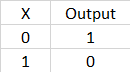

In [5]:
"""NOT Test"""
n_not = Neuron('NOT', 0.5, [-1])
print(n_not)

not_expectation = [[[0], 1], 
                   [[1], 0]]
not_outcome = create_table_data(n_not.activation, not_expectation)

print_table(not_expectation, 'Verwachting')
print_table(not_outcome,'Uitkomst')

test_outcome(not_expectation, not_outcome)


<NOT port>
- Bias = 0.5
- Weights = [-1]

<Verwachting>
   Input  Output
0   [0]       1
1   [1]       0

<Uitkomst>
   Input    Output
0   [0]  0.622459
1   [1]  0.377541

Test mislukt - Verwachting & uitkomst niet hetzelfde


**Uitkomst**

De NOT gate functioneert nog niet helemaal naar behoren

De uitslag komt al in de buurt van 0 -> 1 & 1 -> 0 maar is er nog niet (1/3 van af ongeveer)

In [6]:
"""NOT Test"""
n_not = Neuron('NOT', 6, [-10])
print(n_not)

not_expectation = [[[0], 1], [[1], 0]]
not_outcome = create_table_data(n_not.activation, not_expectation)

print_table(not_expectation, 'Verwachting')
print_table(not_outcome,'Uitkomst')


<NOT port>
- Bias = 6
- Weights = [-10]

<Verwachting>
   Input  Output
0   [0]       1
1   [1]       0

<Uitkomst>
   Input    Output
0   [0]  0.997527
1   [1]  0.017986



**Uitkomst**

De NOT gate functioneert naar behoren

Deze uitkomst tel ik als Correct. Het komt goed in de buurt van de verwachte uitkomst.
Door de parameters hoger te maken liggen de uitkomsten verder uit elkaar.

Bij sigmoid is een gewogen som van ~6 bijna gelijk aan 1 en ~-6 bijna gelijk aan 0

#### AND
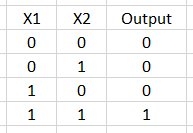


In [7]:
"""AND Test"""

n_and = Neuron('AND', -1.5, [1, 1])
print(n_and)

and_expectation = [[[False, False], False], 
                   [[False, True], False], 
                   [[True, False], False], 
                   [[True, True], True]]
print_table(and_expectation, 'Verwachting')

and_outcome = create_table_data(n_and.activation, and_expectation)


print_table(and_outcome,'Uitkomst')

n_and.error(and_expectation)


<AND port>
- Bias = -1.5
- Weights = [1, 1]

<Verwachting>
             Input  Output
0  [False, False]   False
1   [False, True]   False
2   [True, False]   False
3    [True, True]    True

<Uitkomst>
             Input    Output
0  [False, False]  0.182426
1   [False, True]  0.377541
2   [True, False]  0.377541
3    [True, True]  0.622459


Error: 0.11522248538141906


**Uitkomst**

De AND gate functioneert nog niet helemaal naar behoren

In [8]:
"""AND Test"""

n_and = Neuron('AND', -12, [8, 8])
print(n_and)

and_expectation = [[[False, False], False], 
                   [[False, True], False], 
                   [[True, False], False], 
                   [[True, True], True]]
print_table(and_expectation, 'Verwachting')

and_outcome = create_table_data(n_and.activation, and_expectation)


print_table(and_outcome,'Uitkomst')

n_and.error(and_expectation)


<AND port>
- Bias = -12
- Weights = [8, 8]

<Verwachting>
             Input  Output
0  [False, False]   False
1   [False, True]   False
2   [True, False]   False
3    [True, True]    True

<Uitkomst>
             Input    Output
0  [False, False]  0.000006
1   [False, True]  0.017986
2   [True, False]  0.017986
3    [True, True]  0.982014


Error: 0.00024262782103805154


**Uitkomst**

De AND gate functioneert naar behoren

De error was in eerste instantie eigenlijk al best goed (0.1) Maar na alle parameters x 3 te doen zit het antwoord nog dichter bij de verwachting.

#### OR
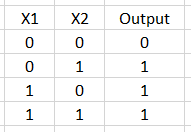

In [9]:
"""OR Test"""

n_or = Neuron('OR', -0.5, [0.5, 0.5])
print(n_or)

or_expectation = [[[False, False], False], 
                   [[False, True], True], 
                   [[True, False], True], 
                   [[True, True], True]]
print_table(or_expectation, 'Verwachting')

or_outcome = create_table_data(n_or.activation, or_expectation)

print_table(or_outcome,'Uitkomst')

n_or.error(or_expectation)


<OR port>
- Bias = -0.5
- Weights = [0.5, 0.5]

<Verwachting>
             Input  Output
0  [False, False]   False
1   [False, True]    True
2   [True, False]    True
3    [True, True]    True

<Uitkomst>
             Input    Output
0  [False, False]  0.377541
1   [False, True]  0.500000
2   [True, False]  0.500000
3    [True, True]  0.622459


Error: 0.19626847829827543


**Uitkomst**

De OR gate functioneert nog niet helemaal naar behoren

In [10]:
"""OR Test"""

n_or = Neuron('OR', -6, [12, 12])
print(n_or)

or_expectation = [[[False, False], False], 
                   [[False, True], True], 
                   [[True, False], True], 
                   [[True, True], True]]
print_table(or_expectation, 'Verwachting')

or_outcome = create_table_data(n_or.activation, or_expectation)

print_table(or_outcome,'Uitkomst')

n_or.error(or_expectation)


<OR port>
- Bias = -6
- Weights = [12, 12]

<Verwachting>
             Input  Output
0  [False, False]   False
1   [False, True]    True
2   [True, False]    True
3    [True, True]    True

<Uitkomst>
             Input    Output
0  [False, False]  0.002473
1   [False, True]  0.997527
2   [True, False]  0.997527
3    [True, True]  1.000000


Error: 4.585398956102585e-06


**Uitkomst**

De OR gate functioneert naar behoren

Door bij de OR port voor een grote toename bij 1 waarde van True te zorgen resulteert dit in een Altijd hoge gewogen soms wanneer er 1 input True is.

#### Nor
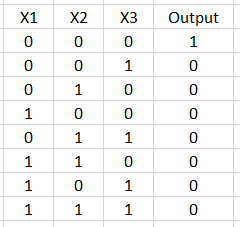



In [11]:
"""NOR Test"""

n_nor = Neuron('NOR', 0, [-1, -1, -1])
print(n_nor)

nor_expectation = [[[False, False, False], True], 
                   [[False, False, True], False], 
                   [[False, True, False], False], 
                   [[True, False, False], False],
                   [[False, True, True], False], 
                   [[True, True, False], False],
                   [[True, False, True], False], 
                   [[True, True, True], False]]
print_table(nor_expectation, 'Verwachting')

nor_outcome = create_table_data(n_nor.activation, nor_expectation)

print_table(nor_outcome,'Uitkomst')

n_nor.error(nor_expectation)


<NOR port>
- Bias = 0
- Weights = [-1, -1, -1]

<Verwachting>
                    Input  Output
0  [False, False, False]    True
1   [False, False, True]   False
2   [False, True, False]   False
3   [True, False, False]   False
4    [False, True, True]   False
5    [True, True, False]   False
6    [True, False, True]   False
7     [True, True, True]   False

<Uitkomst>
                    Input    Output
0  [False, False, False]  0.500000
1   [False, False, True]  0.268941
2   [False, True, False]  0.268941
3   [True, False, False]  0.268941
4    [False, True, True]  0.119203
5    [True, True, False]  0.119203
6    [True, False, True]  0.119203
7     [True, True, True]  0.047426


Error: 0.06398321096100344


**Uitkomst**

De NOR gate functioneert nog niet helemaal naar behoren

In [12]:
"""NOR Test"""

n_nor = Neuron('NOR', 6, [-10, -10, -10])
print(n_nor)

nor_expectation = [[[False, False, False], True], 
                   [[False, False, True], False], 
                   [[False, True, False], False], 
                   [[True, False, False], False],
                   [[False, True, True], False], 
                   [[True, True, False], False],
                   [[True, False, True], False], 
                   [[True, True, True], False]]
print_table(nor_expectation, 'Verwachting')

nor_outcome = create_table_data(n_nor.activation, nor_expectation)

print_table(nor_outcome,'Uitkomst')

n_nor.error(nor_expectation)


<NOR port>
- Bias = 6
- Weights = [-10, -10, -10]

<Verwachting>
                    Input  Output
0  [False, False, False]    True
1   [False, False, True]   False
2   [False, True, False]   False
3   [True, False, False]   False
4    [False, True, True]   False
5    [True, True, False]   False
6    [True, False, True]   False
7     [True, True, True]   False

<Uitkomst>
                    Input        Output
0  [False, False, False]  9.975274e-01
1   [False, False, True]  1.798621e-02
2   [False, True, False]  1.798621e-02
3   [True, False, False]  1.798621e-02
4    [False, True, True]  8.315280e-07
5    [True, True, False]  8.315280e-07
6    [True, False, True]  8.315280e-07
7     [True, True, True]  3.775135e-11


Error: 0.00012207813921879596


**Uitkomst**

De NOR gate functioneert naar behoren

Opnieuw, door het verschil tussen True/False groter te maken druk je de uitkomsten verder naar de 1 of 0 toe. 

## Perceptron netwerk

#### Half-adder
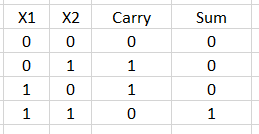

Om de half adder te maken heb ik een NAND gate nodig, 

In [13]:
"""NAND Test"""
NAND = Neuron('NAND', 12, [-8, -8])
print(NAND)

NAND_expectation =      [[[False, False], True], 
                   [[False, True], True], 
                   [[True, False], True], 
                   [[True, True], False]]

NAND_outcome = create_table_data(NAND.activation, NAND_expectation)

print_table(NAND_expectation, 'Verwachting')
print_table(NAND_outcome,'Uitkomst')

NAND.error(NAND_expectation)


<NAND port>
- Bias = 12
- Weights = [-8, -8]

<Verwachting>
             Input  Output
0  [False, False]    True
1   [False, True]    True
2   [True, False]    True
3    [True, True]   False

<Uitkomst>
             Input    Output
0  [False, False]  0.999994
1   [False, True]  0.982014
2   [True, False]  0.982014
3    [True, True]  0.017986


Error: 0.00024262782103805144


**Uitkomst**

De NAND gate functioneert naar behoren

In [14]:
# Laag 1
p1 = Neuron('OR', -6, [12, 12]) # Deze geeft alleen de waarde door
p2 = Neuron('NAND', 12, [-8, -8])
p3 = Neuron('AND', -12, [8, 8])
layer1 = NeuronLayer('Layer-1 [Hidden]', [p1, p2, p3])

# Laag 2
p4 = Neuron('AND', -12, [8, 8, 0])
p5 = Neuron('P5', -6, [0, 0, 12])
layer2 = NeuronLayer('Layer-2 [Hidden]', [p4, p5])



network_adder = NeuronNetwork([layer1, layer2])
print(network_adder)
    
adder_expectation = [[[False, False], [False, False]], 
                   [[False, True], [True, False]], 
                   [[True, False], [True, False]], 
                   [[True, True], [False, True]]]

adder_outcome = create_table_data(network_adder.feed_forward, adder_expectation)

print_table(adder_expectation, 'Verwachting')
print_table(adder_outcome,'Uitkomst')


----------------------------------------
Dit netwerk bestaat uit 2 layers

<Verwachting>
             Input          Output
0  [False, False]  [False, False]
1   [False, True]   [True, False]
2   [True, False]   [True, False]
3    [True, True]   [False, True]

<Uitkomst>
             Input                                        Output
0  [False, False]  [0.01833806257074168, 0.0024728050192708417]
1   [False, True]   [0.9788829093087751, 0.0030664441812802163]
2   [True, False]   [0.9788829093087751, 0.0030664441812802163]
3    [True, True]     [0.02071204244039687, 0.9969335558187198]



**Uitkomst**

Het Half adder netwerkt functioneert naar behoren